In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [3]:
data=pd.read_excel(r"C:\Users\tessl\Downloads\iris (2).xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['SL'].nunique()

35

In [5]:
data['SW'].nunique()

23

In [6]:
data['PL'].nunique()

43

In [7]:
data['PW'].nunique()

22

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

### Preprocessing the data

In [11]:
data.isnull().sum()                        # Implies there is null values

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [12]:
data['SL'].unique()

array([5.1, 4.9, nan, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 4.7,
       5.5, 4.5, 5.3, 7. , 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.4, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [13]:
data['SL'] = data['SL'].fillna(data['SL'].median())  # Filling null values with median

In [14]:
data['SW'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, nan, 4. , 4.4, 3.8, 3.7,
       3.3, 4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [15]:
data['SW'] = data['SW'].fillna(data['SW'].median())

In [16]:
data['PL'] = data['PL'].fillna(data['PL'].median())

### HEAT Map

[]

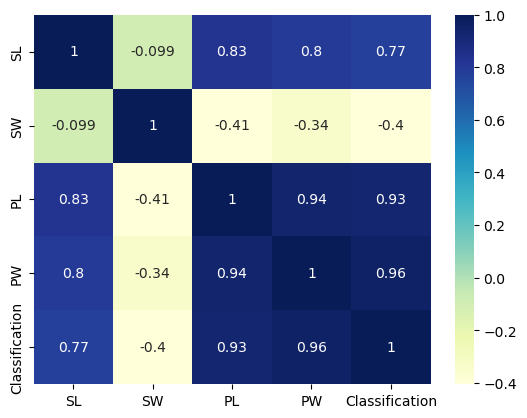

In [22]:
setosa = data[data.Classification == "Iris-setosa"]
versicolor = data[data.Classification=='Iris-versicolor']
virginica = data[data.Classification=='Iris-virginica']
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot=True, cmap='YlGnBu')
plt.plot()

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Classification'] = label_encoder.fit_transform(data['Classification'])

In [19]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Splitting data for training and testing

In [23]:
from sklearn.model_selection import train_test_split

# Droping the target and species since we only need the measurements
x = data.drop(['Classification'], axis=1)

# converting into numpy array and assigning petal length and petal width
x = x.to_numpy()[:, (2,3)]
y = data['Classification']

# Splitting into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [27]:
x_train.shape

(75, 2)

### Logistics Regression

In [29]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model=log_model.fit(x_train,y_train)

In [30]:
y_pred = log_model.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [32]:
print("accuracy is:",accuracy_score(y_test,y_pred))


accuracy is: 0.96


In [33]:
confusion_matrix(y_test,y_pred)

array([[27,  2,  0],
       [ 0, 23,  0],
       [ 0,  1, 22]], dtype=int64)

In [63]:
from sklearn import metrics

print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
print(metrics.classification_report(y_train, y_pred, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_train, ty_pred))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

           0      0.276     0.381     0.320        21
           1      0.458     0.407     0.431        27
           2      0.318     0.259     0.286        27

    accuracy                          0.347        75
   macro avg      0.351     0.349     0.346        75
weighted avg      0.357     0.347     0.348        75



NameError: name 'ty_pred' is not defined

### K nearest neighbours

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
metric_k=[]
neighbors=np.arange(3,15)

In [66]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'euclidean')
    classifier.fit(x_train,y_train)
    y_prediction = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_prediction)
    metric_k.append(acc)

C:\Users\tessl\anaconda3\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\tessl\anaconda3\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

In [67]:
metric_k

[0.9333333333333333,
 0.9066666666666666,
 0.96,
 0.9066666666666666,
 0.9333333333333333,
 0.92,
 0.92,
 0.9066666666666666,
 0.9466666666666667,
 0.92,
 0.92,
 0.92]

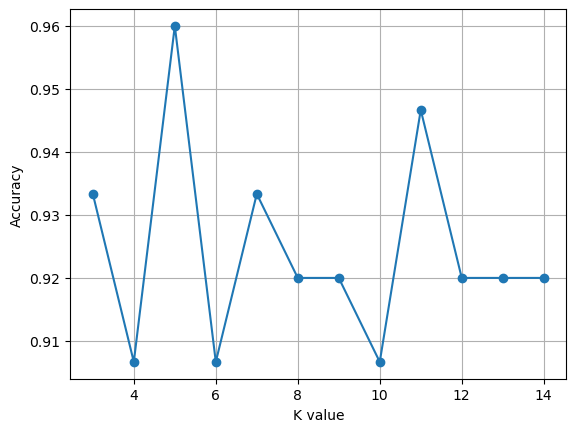

In [68]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid()

In [69]:
 classifier = KNeighborsClassifier(n_neighbors = 5,metric = 'euclidean')
 classifier.fit(x_train,y_train)
 y_prediction = classifier.predict(x_test)

C:\Users\tessl\anaconda3\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [70]:
print("accuracy is:",accuracy_score(y_test,y_prediction))


accuracy is: 0.96


In [71]:
confusion_matrix(y_test,y_prediction)

array([[27,  2,  0],
       [ 0, 23,  0],
       [ 0,  1, 22]], dtype=int64)

In [72]:
from sklearn import metrics

print("Precision, Recall, Confusion matrix, in training\n")

# Precision Recall scores
print(metrics.classification_report(y_train, y_prediction, digits=3))

# Confusion matrix
print(metrics.confusion_matrix(y_train, y_prediction))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

           0      0.296     0.381     0.333        21
           1      0.462     0.444     0.453        27
           2      0.318     0.259     0.286        27

    accuracy                          0.360        75
   macro avg      0.359     0.362     0.357        75
weighted avg      0.364     0.360     0.359        75

[[ 8  5  8]
 [ 8 12  7]
 [11  9  7]]


### SVM Model

In [73]:
from sklearn.svm import SVC

In [74]:
svm_cls = SVC(kernel='linear')
svm_cls = svm_cls.fit(x_train,y_train)
y_pred_svm=svm_cls.predict(x_test)

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [76]:
confusion_matrix(y_test,y_pred_svm)

array([[27,  2,  0],
       [ 0, 23,  0],
       [ 0,  2, 21]], dtype=int64)

In [77]:
accuracy_score(y_test,y_pred_svm)

0.9466666666666667

### Using RBF

In [78]:
svm_cls1 = SVC(kernel='rbf')
svm_cls1 = svm_cls1.fit(x_train,y_train)
y_pred_svm=svm_cls1.predict(x_test)

In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [80]:
confusion_matrix(y_test,y_pred_svm)

array([[27,  2,  0],
       [ 0, 23,  0],
       [ 0,  1, 22]], dtype=int64)

In [81]:
accuracy_score(y_test,y_pred_svm)

0.96

### Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
dt_cls=dt_cls.fit(x_train,y_train)
y_pred_dt=dt_cls.predict(x_test)


In [83]:
confusion_matrix(y_test,y_pred_dt)

array([[29,  0,  0],
       [ 0, 23,  0],
       [ 0,  2, 21]], dtype=int64)

In [84]:
accuracy_score(y_test,y_pred_dt)

0.9733333333333334

### Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
rnd_cls = RandomForestClassifier()
rnd_cls = rnd_cls.fit(x_train,y_train)
y_pred = rnd_cls.predict(x_test)

In [86]:
confusion_matrix(y_test,y_pred)

array([[27,  2,  0],
       [ 0, 23,  0],
       [ 0,  0, 23]], dtype=int64)

In [87]:
accuracy_score(y_test,y_pred)

0.9733333333333334

In [ ]:
Random forest and decision tree has accuracy score of 0.97, while decision tree,logistic regression ,KNN and RBF has accuracy score of .96 , as SVM as 0.94